# Principal Component Analysis

In [ ]:
Dimension reduction
● More efficient storage and computation
● Remove less-informative "noise" features
● ... which cause problems for prediction tasks, e.g. classification, regression

PCA aligns data with axes
● Rotates data samples to be aligned with axes
● Shifts data samples so they have mean 0
● No information is lost

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [3]:
df1 = pd.read_csv("..\data\Grains\seeds-width-vs-length.csv")
grains = np.array(df1)

In [4]:
# Assign the 0th column of grains
width = grains[:,0]
# Assign the 1st column of grains
length = grains[:,1]

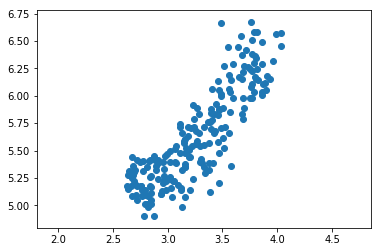

In [5]:
# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

In [6]:
# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width,length)

# Display the correlation
print(correlation)

0.860440532592


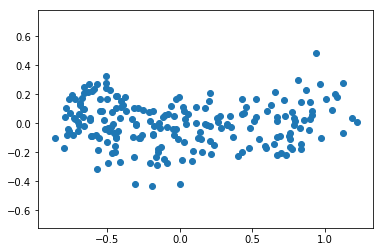

In [8]:
# Create PCA instance
model = PCA()
# Apply the fit_transform method of model to grains
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features
xs = pca_features[:,0]
# Assign 1st column of pca_features
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

In [9]:
# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)
# Display the correlation
print(correlation)

-4.98487046757e-17


In [ ]:
PCA features are not correlated
● Features of dataset are often correlated
● PCA aligns the data with axes
● Resulting PCA features are not linearly correlated ("decorrelation")

Pearson correlation
● Measures linear correlation of features
● Value between -1 and 1
● Value of 0 means no linear correlation

Principal components
● Principal components = directions of variance
● PCA aligns principal components with the axes
● Available as components_ attribute of PCA object
print(model.components_)
● Each row defines displacement from mean

# Intrinsic Dimension

In [ ]:
● Intrinsic dimension = number of features needed to approximate the dataset
● Essential idea behind dimension reduction
● What is the most compact representation of the samples?

PCA identifies intrinsic dimension
● Scatter plots work only if samples have 2 or 3 features
● PCA identifies intrinsic dimension when samples have any number of features
● Intrinsic dimension = number of PCA features with significant variance

PCA features are ordered by variance descending

Intrinsic dimension can be ambiguous
● Intrinsic dimension is an idealization
● … there is not always one correct answer!

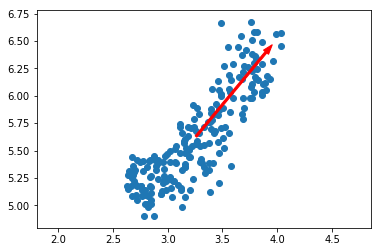

In [15]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance
model = PCA()
# Fit model to points
pca_features = model.fit(grains)

# Get the mean of the grain samples
mean = model.mean_
# Get the first principal component
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.02)

# Keep axes on same scale
plt.axis('equal')
plt.show()

In [5]:
df2 = pd.read_csv("..\data\samples.csv")
fish = np.array(df2)

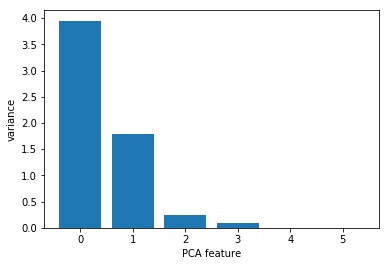

In [6]:
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler,pca)

pipeline.fit(fish)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [7]:
scaler = StandardScaler()
scaler.fit(fish)
StandardScaler(copy=True, with_mean=True, with_std=True)
fish_scaled = scaler.transform(fish)

In [8]:
# Create a PCA model with 2 components
pca = PCA(n_components=2)
# Fit the PCA instance to the scaled samples
pca.fit(fish_scaled)

# Transform the scaled samples
pca_features = pca.transform(fish_scaled)

# Print the shape of pca_features
print(pca_features.shape)

(84, 2)
